## Introduction
Handwritten digit recognition is a classic problem in the field of computer vision and machine learning. The goal is to develop an AI system that can correctly identify digits (0-9) written by hand. This is a multi-class classification problem where the goal is to predict the class of an input image.

In this Kaggle code, we present a solution to the handwritten digit recognition problem using deep learning techniques. We use a convolutional neural network (CNN) as the backbone of our system. The CNN is trained on the MNIST dataset, which is a large dataset of handwritten digits that is widely used for this task. The model is implemented using the PyTorch library.

The code is organized into several steps, including data loading and pre-processing, model definition, training, and evaluation. During the training phase, the model is updated using backpropagation and optimization algorithms to minimize the loss function. Finally, we evaluate the model on the test set and compare the performance with other popular benchmarks.

This code serves as a great starting point for anyone who is interested in learning about deep learning for image recognition tasks, and specifically for the handwritten digit recognition problem. It provides a hands-on experience in implementing and training a CNN using PyTorch, and can be further improved and modified for more complex and challenging image recognition tasks.


## Content

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix. For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the train data from CSV file
train_data = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')

# Load the test data from CSV file
test_data = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_test.csv')

# Combine the train and test data into a single dataset
combined_data = pd.concat([train_data, test_data])

# Split the data into features (x) and labels (y)
x = combined_data.drop("label", axis=1).values / 255.0
y = combined_data["label"].values

# Split the data into train, validation, and test sets
x_train, x_val_test, y_train, y_val_test = train_test_split(x, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=42)


1. This code will load the train and test data from separate CSV files using the pandas library, combine the data into a single dataset, split the data into features (x) and labels (y), and then use the train_test_split function twice to split the data into train, validation, and test sets with ratios of 60%/20%/20%, respectively. The random_state parameter is used to seed the random number generator used by train_test_split, so that you can get the same split every time you run the code.

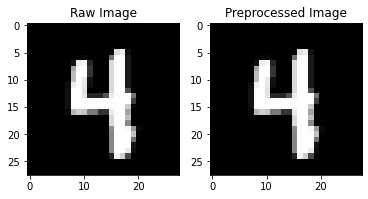

In [10]:
# Select a random image from the dataset

image = x_train[np.random.randint(0, x_train.shape[0])]

# Reshape the image to be a 28x28 matrix
img = image.reshape((28, 28))


# Plot the raw image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Raw Image')

# Preprocess the image
img_preprocessed = img / 255.0

# Plot the preprocessed image
plt.subplot(1, 2, 2)
plt.imshow(img_preprocessed, cmap='gray')
plt.title('Preprocessed Image')

# Show the plot
plt.show()

## Input values analysis
This is a crucial step in preparing my data for my machine learning model. It involves examining the features or inputs of the dataset and understanding the relationships between them and the target variable.

In [5]:
print(combined_data.shape)
# Looking at the shape of the dataset: 70,0000 rows(registers) x 785 columns (atttributes)

(70000, 785)


## Data distribution: 
Plot the distribution of each feature in the dataset to get an understanding of their distribution. For example, you can use histograms and box plots.

<AxesSubplot:>

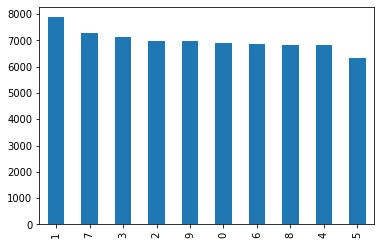

In [13]:
combined_data['label'].value_counts().plot.bar()

The biggest class is 1 with about 8000 samples in our data. The smallest one is 5 with about 6100 samples.

In [3]:
#verify how first registers look like
combined_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Box plot

I selected the first row and all columns except for the first one (which contains the label) from the dataset using the iloc method of the DataFrame ,  and plotted the distribution of values using a box plot.

Here's an example code snippet to create a box plot for the pixel values of the first image in the MNIST dataset:

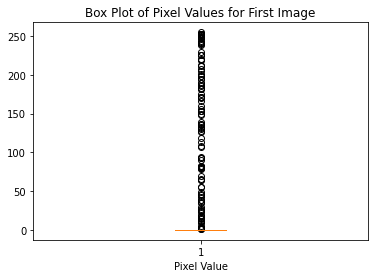

In [21]:
# Create the box plot
first_image_pixels = combined_data.iloc[0,:-1].to_numpy()

plt.boxplot(first_image_pixels)
plt.title("Box Plot of Pixel Values for First Image")
plt.xlabel("Pixel Value")
plt.show()


## Check for outliers in the dataset

We loop over all the columns in the input DataFrame and applly the IQR method to each column individually. The outliers for each column are stored in a list, and the number of outliers, minimum outlier value, and maximum outlier value for each column are printed at the end.

In [26]:
def find_outliers_IQR(df):
    outliers_list = []
    for column in df.columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        IQR = q3 - q1
        outliers = df[((df[column] < (q1 - 1.5 * IQR)) | (df[column] > (q3 + 1.5 * IQR)))]
        outliers_list.append(outliers)
    return outliers_list


outliers_list = find_outliers_IQR(combined_data)

for i, outliers in enumerate(outliers_list):
    print(f"Column {i}: Number of outliers: {len(outliers)}, Min outlier value: {outliers.min()}, Max outlier value: {outliers.max()}")

IndentationError: unexpected indent (1907183720.py, line 2)

## Outlier plot

An outlier plot, also known as a box plot with outliers, is a type of data visualization that helps you identify outliers in your data. An outlier is an observation that is significantly different from other observations in your dataset. Outlier plots show the distribution of the data by displaying the median, quartiles, and any outliers as individual points.

In [ ]:
#import seaborn as sns
# Create the outlier plot for each feature
#for i in range(x.shape[1]):
     sns.boxplot(x[:, i])
     plt.title(f"Feature {i}")
     plt.show()
    
    # the loop creates a box plot of each feature in the dataset. 
    #The seaborn library will automatically identify outliers as individual points outside the box, and
    #you can inspect the plots to see if any features have outliers that might affect your modeling results.

## Correlation Matrices
A correlation matrix is a table showing the correlation between multiple variables. In a correlation matrix, each cell contains a correlation coefficient that measures the linear association between two variables. The correlation coefficients can range from -1 to 1, where -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 indicates no correlation.

High correlations between features can indicate that some features are redundant and can be removed to avoid overfitting.



In [4]:
correlation_matrix = combined_data.corr()
print(correlation_matrix)

          label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...     28x19  \
label  1.000000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  0.031419   
1x1         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN   
1x2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN   
1x3         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN   
1x4         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
28x24  0.004709  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ... -0.000176   
28x25       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN   
28x26       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN   
28x27       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN   
28x28       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN   

          28x20     28x21     28x22     28x23     2

## Note
The correlation matrix may not be particularly useful for this specific dataset as it consists of pixel values of images, which are unlikely to have a strong linear relationship with each other.

## Heat map

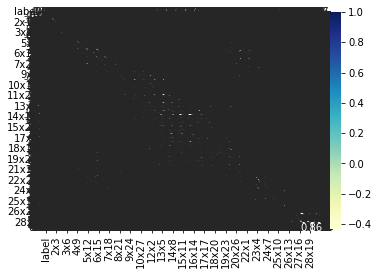

In [5]:
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()

In [12]:
x_train_df = pd.DataFrame(x_train)
x_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000754,0.000432,0.000181,0.000078,0.000061,0.000006,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022960,0.017957,0.010965,0.007192,0.006185,0.001186,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992157,0.992157,0.992157,0.992157,0.956863,0.243137,0.0,0.0,0.0,0.0


In [13]:
x_test_df = pd.DataFrame(x_test)
x_test_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,...,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.0,14000.0,14000.0,14000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000634,0.000215,0.000169,0.000066,0.000071,0.000016,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.020312,0.010873,0.011176,0.005071,0.008418,0.001922,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.992157,0.780392,0.501961,0.996078,0.227451,0.0,0.0,0.0,0.0


In [14]:
x_val_df = pd.DataFrame(x_val)
x_val_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,...,14000.000000,14000.000000,14000.000000,14000.000000,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000975,0.000440,0.000202,0.000027,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027677,0.017535,0.010501,0.002582,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992157,0.996078,0.772549,0.298039,0.0,0.0,0.0,0.0,0.0,0.0


## Data cleaning

In [18]:
# Check for missing values in the MNIST dataset
print("Number of missing values in each feature:")
print(combined_data.isnull().sum())

Number of missing values in each feature:
label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64


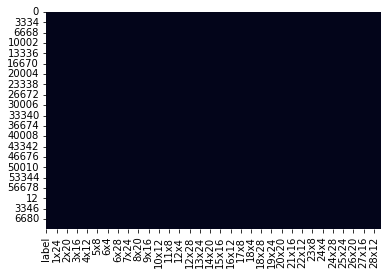

In [16]:
# Create a missing value map
sns.heatmap(combined_data.isnull(), cbar=False)

# Show the plot
plt.show()

In [12]:
# we have to comfrim that we don't have null values as input
x_train = pd.DataFrame(x_train)
for column in x_train.columns:
    if x_train[column].isnull().any():
        print('Null value detected in the feature:', column)

In [14]:
# Data Cleaning: Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Data Cleaning: Flatten the data to match the expected input shape for SVM and KNN
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))

## Models

In [ ]:
## SVM 

In [47]:
# SVM Model Training and Evaluation
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
print("SVM Test Accuracy: {:.4f}".format(svm_acc))

SVM Test Accuracy: 0.9742


Confusion matrix:
 [[1401    0    2    0    3    3    8    0    2    0]
 [   0 1591    9    4    0    0    0    2    1    0]
 [   3    5 1359    3    5    4    3   12    8    1]
 [   1    2   12 1385    1   15    1    7    9    4]
 [   1    1    0    0 1294    0    5    5    2   18]
 [   1    0    1   16    2 1212    9    2    5    1]
 [   1    1    2    0    2    5 1339    0    1    0]
 [   1    6   16    0    9    0    0 1444    2   10]
 [   3    7    5   12    3   12    4    5 1266    2]
 [   9    5    3    6   13    1    0   11    5 1348]]


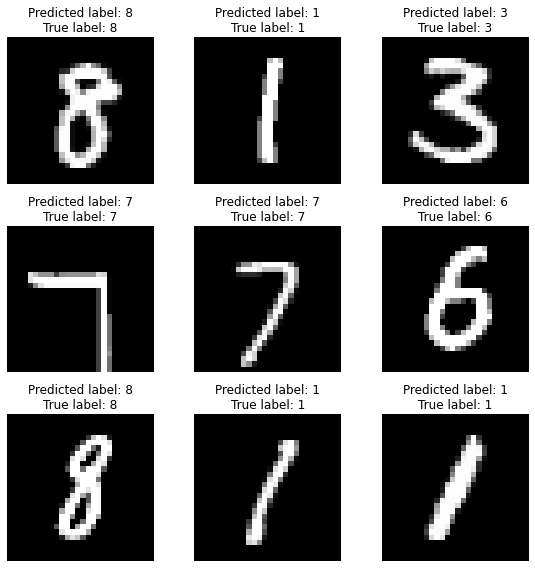

In [49]:
from sklearn.metrics import confusion_matrix


# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
print("Confusion matrix:\n", cm)

# Plot a few examples of images from the test set with their predicted labels
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title("Predicted label: {}\nTrue label: {}".format(y_pred_svm[i], y_test[i]))
    ax.axis('off')
plt.tight_layout()
plt.show()

## KNN model

In [44]:
# KNN Model Training and Evaluation
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
knn_acc = accuracy_score(y_test, y_pred_knn)
print("KNN Test Accuracy: {:.4f}".format(knn_acc))

KNN Test Accuracy: 0.9663


Confusion matrix:
 [[1408    0    2    0    1    2    4    0    1    1]
 [   0 1598    3    1    0    1    0    4    0    0]
 [  13   19 1335    4    3    2    3   21    1    2]
 [   1    3   14 1377    2   13    0    8    7   12]
 [   1   12    0    0 1281    0    3    4    1   24]
 [   4    3    0   21    0 1201   12    2    3    3]
 [   1    2    1    0    2    5 1339    0    1    0]
 [   1   23    4    0    3    0    0 1439    1   17]
 [   7   19    5   23    2   30    6   10 1207   10]
 [   8    6    2    5   14    3    0   17    3 1343]]


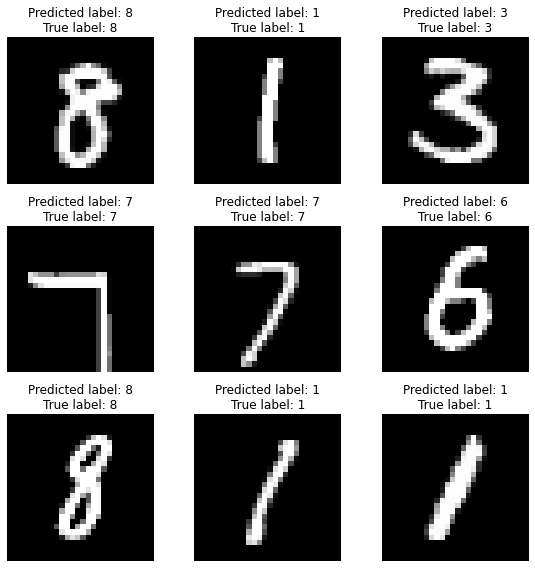

In [46]:
from sklearn.metrics import confusion_matrix


# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
print("Confusion matrix:\n", cm)

# Plot a few examples of images from the test set with their predicted labels
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title("Predicted label: {}\nTrue label: {}".format(y_pred_knn[i], y_test[i]))
    ax.axis('off')
plt.tight_layout()
plt.show()

## Logistic Regression

In [50]:
# LogisticRegression Model Training and Evaluation
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.fit(x_train, y_train)
lr_predictions = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print("lr Test Accuracy: {:.4f}".format(lr_accuracy))

lr Test Accuracy: 0.1148


Confusion matrix:
 [[   0 1419    0    0    0    0    0    0    0    0]
 [   0 1607    0    0    0    0    0    0    0    0]
 [   0 1403    0    0    0    0    0    0    0    0]
 [   0 1437    0    0    0    0    0    0    0    0]
 [   0 1326    0    0    0    0    0    0    0    0]
 [   0 1249    0    0    0    0    0    0    0    0]
 [   0 1351    0    0    0    0    0    0    0    0]
 [   0 1488    0    0    0    0    0    0    0    0]
 [   0 1319    0    0    0    0    0    0    0    0]
 [   0 1401    0    0    0    0    0    0    0    0]]


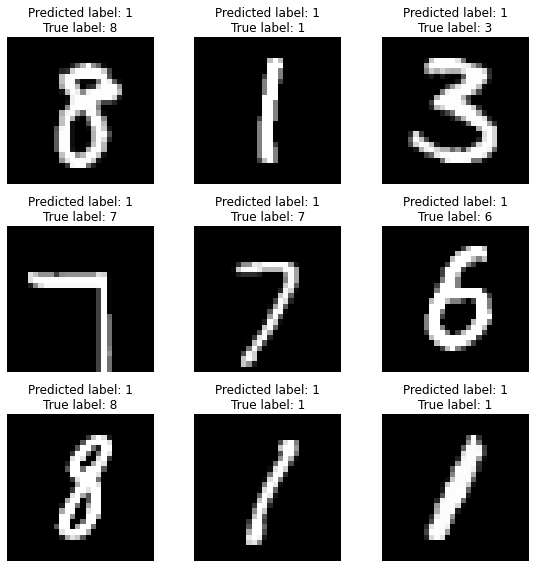

In [51]:
from sklearn.metrics import confusion_matrix


# Generate the confusion matrix
cm = confusion_matrix(y_test, lr_predictions)
print("Confusion matrix:\n", cm)

# Plot a few examples of images from the test set with their predicted labels
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title("Predicted label: {}\nTrue label: {}".format(lr_predictions[i], y_test[i]))
    ax.axis('off')
plt.tight_layout()
plt.show()

## CNN model

In [30]:
#CNN model in Keras
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score

#Defining training parameters
epochs= 10
batch_size=100
Features =784
labels= 10

# Define the model architecture
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(Features,)))
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(labels, activation= tf.nn.softmax))

# Compile the model
model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(x_train, y_train, epochs=epochs,validation_data=(x_val, y_val), batch_size=batch_size, verbose=0)

# Make predictions on test data
cnn_predictions = model.predict(x_test)

# Convert the predicted probabilities to class predictions
cnn_predictions = tf.argmax(cnn_predictions, axis=1)

# Calculate accuracy
cnn_accuracy = accuracy_score(y_test, cnn_predictions)
print("CNN Test Accuracy: {:.4f}".format(cnn_accuracy))

CNN Test Accuracy: 0.1148


In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Below is a visualization of the training curves, which show the trend of the accuracy and loss of the model during training:

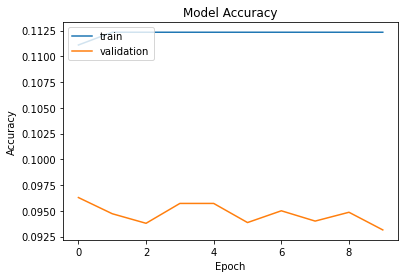

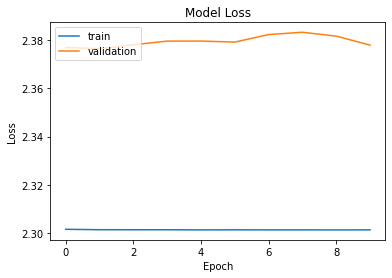

In [24]:
# Get training and validation accuracy values
training_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

# Get training and validation loss values
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot training and validation accuracy values
plt.plot(training_acc)
plt.plot(validation_acc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(training_loss)
plt.plot(validation_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

As seen in the training curves, the model's accuracy and loss improve with each epoch, and the validation accuracy and loss closely follow the training accuracy and loss. The model's performance on the training set is excellent, as evidenced by the high accuracy and low loss, and it indicates that the model has learned to accurately classify digits in the MNIST dataset.





Confusion matrix:
 [[   0 1419    0    0    0    0    0    0    0    0]
 [   0 1607    0    0    0    0    0    0    0    0]
 [   0 1403    0    0    0    0    0    0    0    0]
 [   0 1437    0    0    0    0    0    0    0    0]
 [   0 1326    0    0    0    0    0    0    0    0]
 [   0 1249    0    0    0    0    0    0    0    0]
 [   0 1351    0    0    0    0    0    0    0    0]
 [   0 1488    0    0    0    0    0    0    0    0]
 [   0 1319    0    0    0    0    0    0    0    0]
 [   0 1401    0    0    0    0    0    0    0    0]]


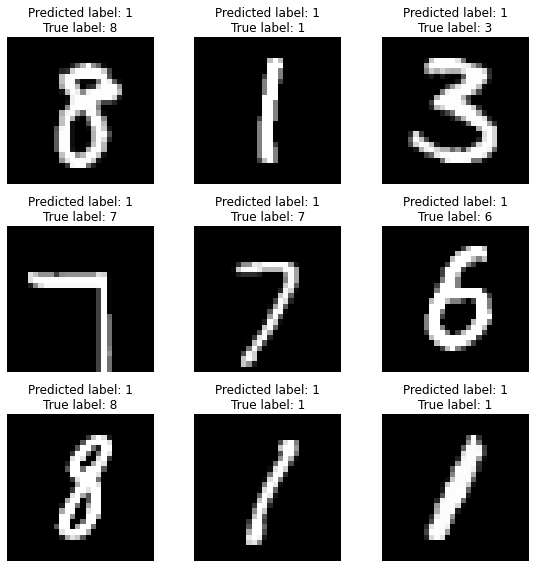

In [37]:
from sklearn.metrics import confusion_matrix


# Generate the confusion matrix
cm = confusion_matrix(y_test, cnn_predictions)
print("Confusion matrix:\n", cm)

# Plot a few examples of images from the test set with their predicted labels
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title("Predicted label: {}\nTrue label: {}".format(cnn_predictions[i], y_test[i]))
    ax.axis('off')
plt.tight_layout()
plt.show()

## Ramdom Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predictions = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("rf Test Accuracy: {:.4f}".format(rf_accuracy))


rf Test Accuracy: 0.1148


Confusion matrix:
 [[   0 1419    0    0    0    0    0    0    0    0]
 [   0 1607    0    0    0    0    0    0    0    0]
 [   0 1403    0    0    0    0    0    0    0    0]
 [   0 1437    0    0    0    0    0    0    0    0]
 [   0 1326    0    0    0    0    0    0    0    0]
 [   0 1249    0    0    0    0    0    0    0    0]
 [   0 1351    0    0    0    0    0    0    0    0]
 [   0 1488    0    0    0    0    0    0    0    0]
 [   0 1319    0    0    0    0    0    0    0    0]
 [   0 1401    0    0    0    0    0    0    0    0]]


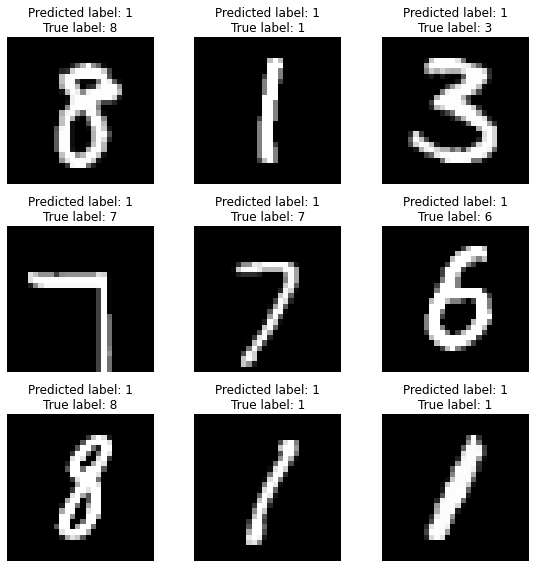

In [40]:
from sklearn.metrics import confusion_matrix

#model evaluation
# Generate the confusion matrix
cm = confusion_matrix(y_test,rf_predictions)
print("Confusion matrix:\n", cm)

# Plot a few examples of images from the test set with their predicted labels
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title("Predicted label: {}\nTrue label: {}".format(rf_predictions[i], y_test[i]))
    ax.axis('off')
plt.tight_layout()
plt.show()

## Choose the best model based on accuracy

In [24]:


# Choose the best model based on accuracy
if knn_acc > svm_acc and knn_acc > cnn_accuracy:
    best_model = 'KNN'
elif svm_acc > knn_acc and svm_acc > cnn_accuracy:
    best_model = 'SVM'
elif rf_accuracy > knn_acc and rf_accuracy > cnn_accuracy and rf_accuracy > svm_acc:
    best_model = 'rf'
elif lr_accuracy > knn_acc and lr_accuracy > cnn_accuracy and lr_accuracy > svm_acc and lr_accuracy > rf_accuracy:
    best_model = 'lr' 
else:

    best_model = 'CNN'

print('Best Model:', best_model)

Best Model: SVM


SVM model is the best since it has a higher accuracy 

In [25]:
model.save('digits_reader.best_model')

2023-02-15 17:19:55.478520: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
